In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tools import *

In [2]:
# name of the file, or files (with wildcard) to open
dataname = '/Users/jlilly/viz/tusas/650x128_at0.6/results.e.8.*'
#dataname = '/Users/jlilly/mnt/Farzadi/2208x2208/at0.6/decomp/results.e.512.*'

# position in x for line data
x_pos = 259.51
#x_pos = 1200

# threshold for whether dendrites are treated as paired
threshold = 6

In [3]:
file_list = sorted(glob.glob(dataname))
datapath = '/'.join(dataname.split('/')[:-1]) + '/'
filename = datapath + f'{x_pos:g}.csv'

xmin, xmax, ymin, ymax = get_mesh_dims(file_list)

data = extract_line_data(filename, file_list, x_pos, ymin, ymax, threshold)

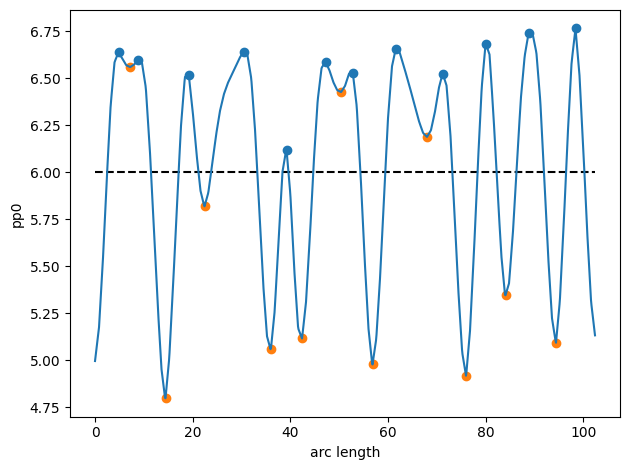

distances between dendrites = [ 3.9936 10.3426 11.264   8.806   7.987   5.53    8.909   9.523   8.909
  8.806   9.523 ]
dendrites are paired = [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


In [4]:
x = data['DataFrame']['arc_length'].values
pp0 = data['DataFrame']['pp0'].values

fig, ax = plt.subplots(1, 1)

ax.plot(x, threshold * np.ones(x.shape[0]), 'k--')
ax.plot(x, pp0)

ax.scatter(data['x_relmax'], data['pp0_relmax'])
ax.scatter(data['x_relmin'], data['pp0_relmin'])

#x_relmax_mid = np.array([(x_relmax[i + 1] + x_relmax[i]) / 2 for i in range(pp0_relmax.size - 1)])
#pp0_max_max = np.array([np.max([pp0_relmax[i + 1], pp0_relmax[i]]) + 0.05 for i in range(pp0_relmax.size - 1)])
#for i in range(pp0_relmax.size - 1):
#    ax.text(x_relmax_mid[i], pp0_max_max[i], f'{dists[i]:.2f}')
# END for

ax.set_ylabel('pp0')
ax.set_xlabel('arc length')

#ax.set_xlim([500, 700])

fig.tight_layout()
plt.show()

print(f'distances between dendrites = {data['dists']}')
print(f'dendrites are paired = {data['pairs']}')